# NAME: BENEDICT BEGOR BORTEY

# INDEX NUMBER: 4291720

# COURSE:MET 359

# PROJECT TITLE: A CASE STUDY OF THE RAINFALL PATTERNS IN OMAN

In [125]:
#importing libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.ticker as mticker

In [126]:
xr.open_mfdataset('/home/benedict/MET359/Benedict_oman/*.nc')

<xarray.Dataset>
Dimensions:   (lon: 34, lat: 41, datetime: 6210)
Coordinates:
  * lon       (lon) float32 51.75 52.0 52.25 52.5 ... 59.25 59.5 59.75 60.0
  * lat       (lat) float32 26.75 26.5 26.25 26.0 ... 17.5 17.25 17.0 16.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2018-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 41, 34), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [127]:
oman_data = xr.open_mfdataset('/home/benedict/MET359/Benedict_oman/*.nc')
oman_data

<xarray.Dataset>
Dimensions:   (lon: 34, lat: 41, datetime: 6210)
Coordinates:
  * lon       (lon) float32 51.75 52.0 52.25 52.5 ... 59.25 59.5 59.75 60.0
  * lat       (lat) float32 26.75 26.5 26.25 26.0 ... 17.5 17.25 17.0 16.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2018-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 41, 34), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [128]:
oman= oman_data.sel(datetime=slice("2005","2014"),lon=(55.75),lat=(21.5))
oman

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
    lon       float32 55.75
    lat       float32 21.5
  * datetime  (datetime) datetime64[ns] 2005-01-01 2005-01-02 ... 2014-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [142]:
oman_preci = oman['precip']
oman_preci

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 55.75
    lat       float32 21.5
  * datetime  (datetime) datetime64[ns] 2005-01-01 2005-01-02 ... 2014-12-31
Attributes:
    grid_mapping:  crs

# 1. COMPUTATION OF THE MONTHLY RAINFALLS AND CLIMATOLOGIES

In [130]:
monthly_rainfall_totals = oman_preci.resample(datetime='1M').sum()
monthly_rainfall_totals

,Array,Chunk
Bytes,480 B,4 B
Shape,"(120,)","(1,)"
Count,785 Tasks,120 Chunks
Type,float32,numpy.ndarray


In [131]:
oman_clim = monthly_rainfall_totals.groupby('datetime.month').mean('datetime')
oman_clim

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 55.75
    lat      float32 21.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# 2.COMPUTATION OF THE TOTAL ANNUAL RAINFALL

In [140]:
annual_total = oman_preci.resample(datetime='1Y').sum()
annual_total

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2005-12-31 2006-12-31 ... 2014-12-31
    lon       float32 55.75
    lat       float32 21.5

In [141]:
annual_average = annual_total.groupby('datetime.month').mean('datetime')
annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 55.75
    lat      float32 21.5
  * month    (month) int64 12


# PLOTTING THE TIME SERIES FOR THE TOTAL ANNUAL RAINFALL

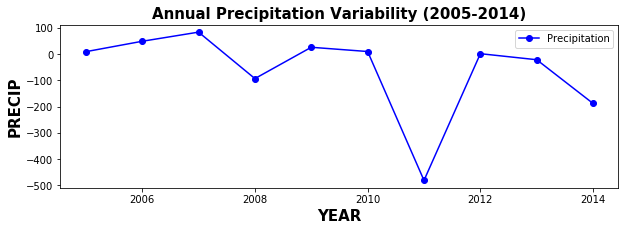

In [144]:
annual_total = oman_preci.groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_total.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Annual Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,)
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15)
plt.legend()
plt.show()

# 3. COMPUTATION OF THE NUMBER OF DRY AND WET DAYS PER MONTH AND PER YEAR AND PRODUCTION OF TIMR SERIES AND SPATIAL PLOTS

In [12]:
oman_1=xr.open_mfdataset('/home/benedict/MET359/Benedict_oman/*.nc')
oman_1

<xarray.Dataset>
Dimensions:   (lon: 34, lat: 41, datetime: 6210)
Coordinates:
  * lon       (lon) float32 51.75 52.0 52.25 52.5 ... 59.25 59.5 59.75 60.0
  * lat       (lat) float32 26.75 26.5 26.25 26.0 ... 17.5 17.25 17.0 16.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2018-01-01
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 41, 34), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [13]:
omann= oman_1.sel(datetime=slice("2005","2014"),lon=(55.75),lat=(21.5))
omann

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
    lon       float32 55.75
    lat       float32 21.5
  * datetime  (datetime) datetime64[ns] 2005-01-01 2005-01-02 ... 2014-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [14]:
oman_precip1 = oman_1['precip']
oman_precip1

<xarray.DataArray 'precip' (datetime: 6210, lat: 41, lon: 34)>
dask.array<concatenate, shape=(6210, 41, 34), dtype=float32, chunksize=(366, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 51.75 52.0 52.25 52.5 ... 59.25 59.5 59.75 60.0
  * lat       (lat) float32 26.75 26.5 26.25 26.0 ... 17.5 17.25 17.0 16.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2018-01-01
Attributes:
    grid_mapping:  crs

In [15]:
ds = oman_precip1
dry_days_per_year = (ds < 1).groupby('datetime.year').sum(dim='datetime')
dry_days_per_year

<xarray.DataArray 'precip' (year: 18, lat: 41, lon: 34)>
dask.array<stack, shape=(18, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2014 2015 2016 2017 2018

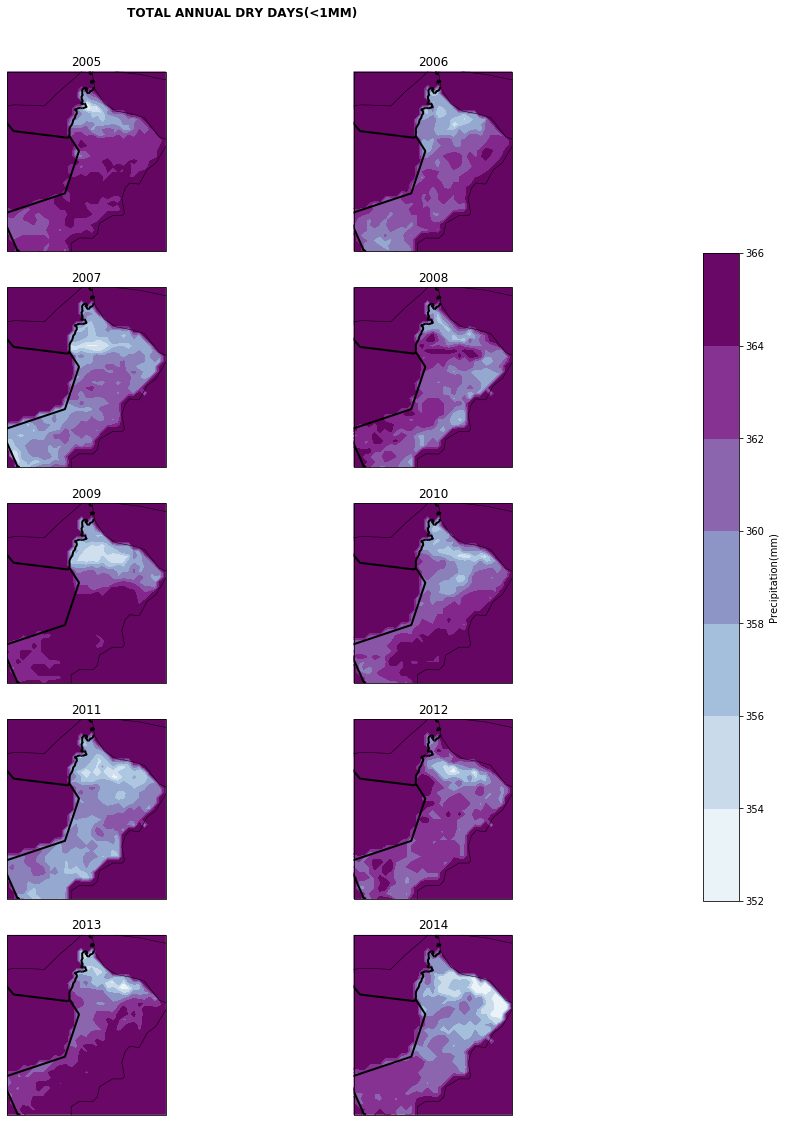

In [16]:
fig,ax=plt.subplots(5,2,figsize=(20,18),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year_names=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75], crs=ccrs.PlateCarree())
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(dry_days_per_year.lon,dry_days_per_year.lat,dry_days_per_year[i],
                       cmap='BuPu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL DRY DAYS(<1MM)', fontweight='bold');


In [17]:
ws = oman_precip1
wet_days_per_year = (ws >= 1).groupby('datetime.year').sum(dim='datetime')
wet_days_per_year

<xarray.DataArray 'precip' (year: 18, lat: 41, lon: 34)>
dask.array<stack, shape=(18, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2014 2015 2016 2017 2018

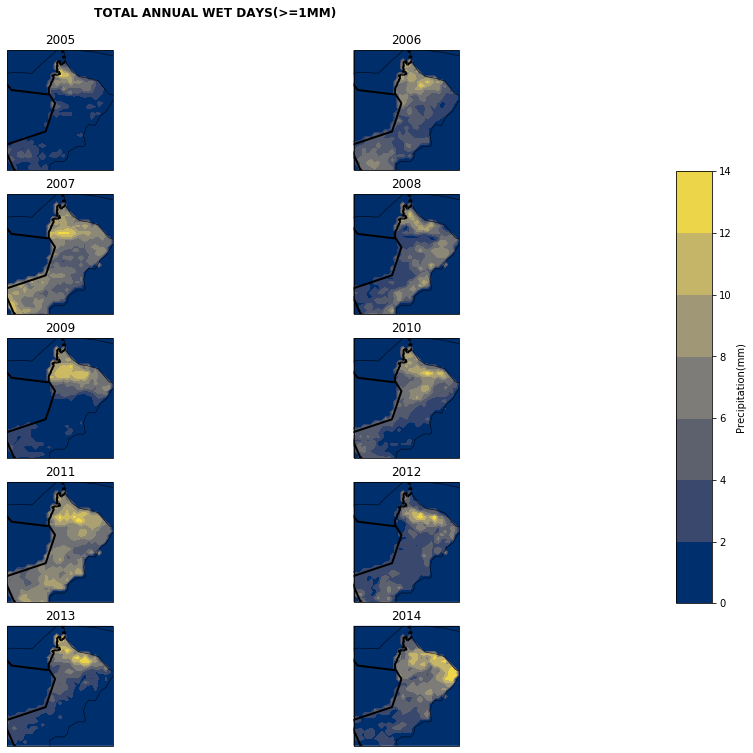

In [18]:
fig,ax=plt.subplots(5,2,figsize=(20,12),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
year_names=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75], crs=ccrs.PlateCarree())
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(wet_days_per_year.lon,wet_days_per_year.lat,wet_days_per_year[i],
                       cmap='cividis', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL ANNUAL WET DAYS(>=1MM)', fontweight='bold');

In [19]:
wet_days_per_month1= (ws>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 41, lon: 34)>
dask.array<stack, shape=(12, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [20]:
wet_days_per_month1.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [21]:
month_names=wet_days_per_month1['month']
month_names

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

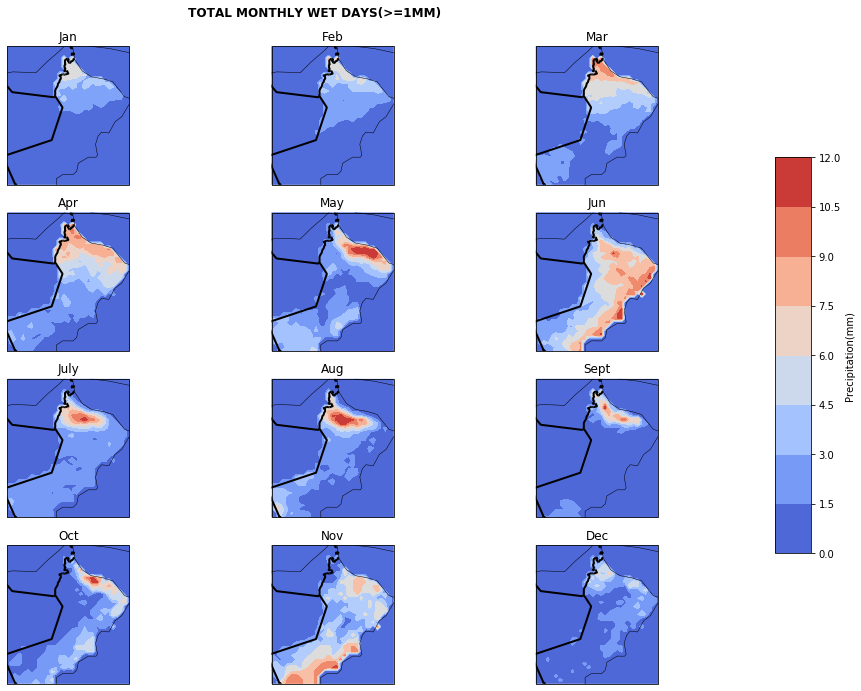

In [22]:
fig,ax=plt.subplots(4,3,figsize=(20,11),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()

month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('TOTAL MONTHLY WET DAYS(>=1MM)', fontweight='bold');

In [23]:
wet_days_per_month1= (ws>1).groupby('datetime.month').sum(dim='datetime')
wet_days_per_month1

<xarray.DataArray 'precip' (month: 12, lat: 41, lon: 34)>
dask.array<stack, shape=(12, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

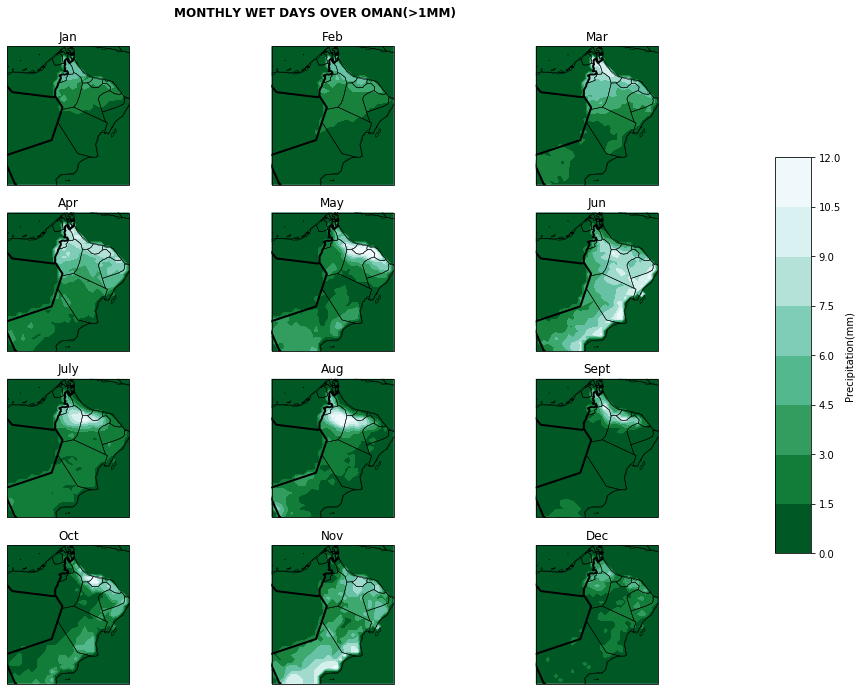

In [24]:
fig,ax=plt.subplots(4,3,figsize=(20,11),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_per_month1.lon,wet_days_per_month1.lat,wet_days_per_month1[i],
                       cmap='BuGn_r', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS OVER OMAN(>1MM)', fontweight='bold');

In [25]:
dry_days_per_month2= (ds<1).groupby('datetime.month').sum(dim='datetime')
dry_days_per_month2

<xarray.DataArray 'precip' (month: 12, lat: 41, lon: 34)>
dask.array<stack, shape=(12, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

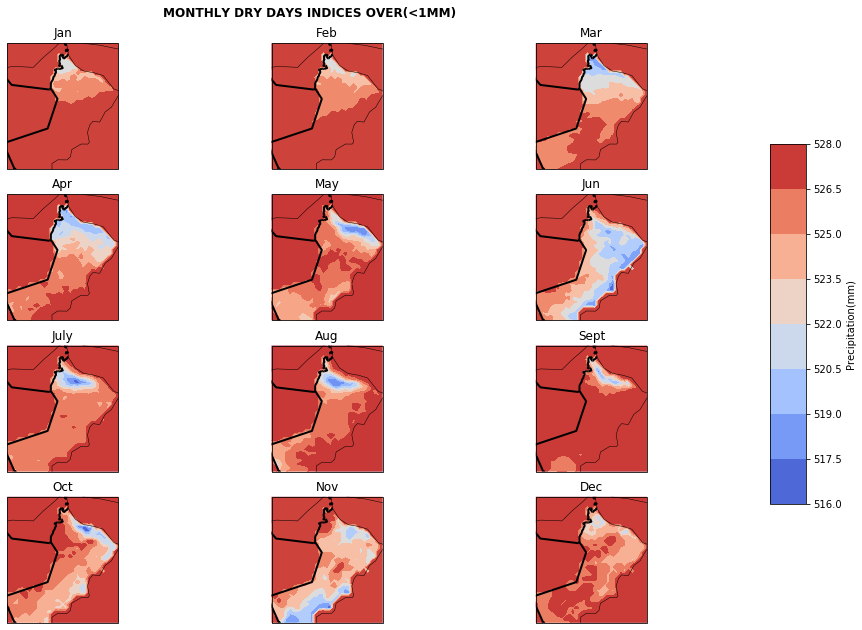

In [26]:
fig,ax=plt.subplots(4,3,figsize=(20,10),subplot_kw={'projection': ccrs.PlateCarree()}) 
ax=ax.flatten()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75], crs=ccrs.PlateCarree())
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_per_month2.lon,dry_days_per_month2.lat,dry_days_per_month2[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Precipitation(mm)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS INDICES OVER(<1MM)', fontweight='bold');

In [27]:
#NUMBER OF DRY DAYS(RR<1mm) AND WET DAYS (RR>=1mm) PER MONTH
dry_days = (oman['precip']< 1).resample(datetime='1M').sum()
wet_days = (oman['precip']>=1).resample(datetime='1M').sum()

In [28]:

wet_days_monthly= wet_days.groupby('datetime.month').sum(dim='datetime')
dry_days_monthly= dry_days.groupby('datetime.month').sum(dim='datetime')

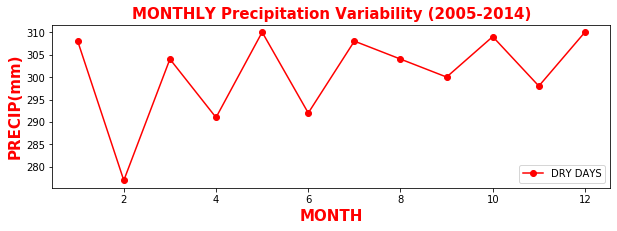

In [137]:
   #TIMESERIES FOR DRY DAYS(RR<1mm) PER MONTH
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('MONTHLY Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

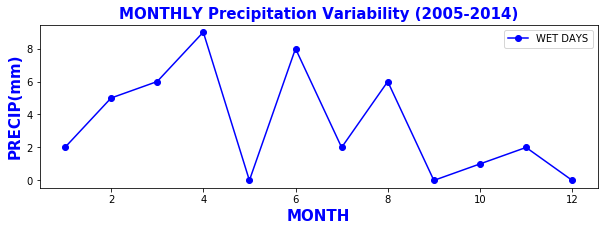

In [138]:
#TIMESERIES FOR WET DAYS(RR>1mm) PER MONTH
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('MONTHLY Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

# TIMESERIES FOR DRY DAYS

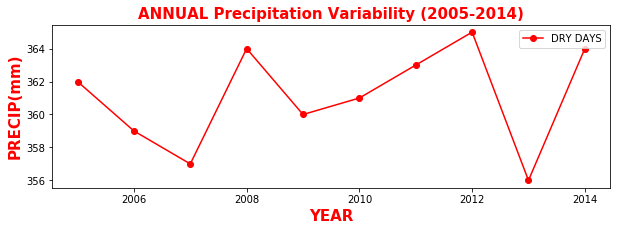

In [146]:
dry_days_annual = (oman['precip']< 1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_annual.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('ANNUAL Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

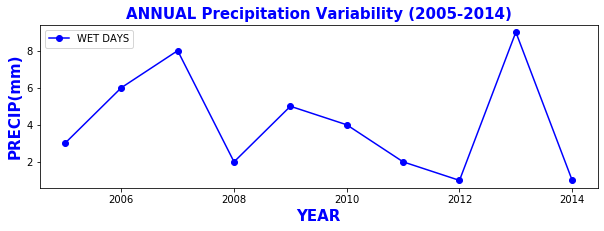

In [147]:
wet_days_annual = (oman['precip']>=1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_annual.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('ANNUAL Precipitation Variability (2005-2014)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

# 4.COMPUTATION OF EXTREME RAINFALL INDICES

In [75]:
extreme_10mm = oman_precip1
extreme_10mm_annual_wet_days = (extremme_10mm > 10).groupby('datetime.year').sum(dim='datetime')
extreme_10mm_annual_wet_days

<xarray.DataArray 'precip' (year: 18, lat: 41, lon: 34)>
dask.array<stack, shape=(18, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2014 2015 2016 2017 2018

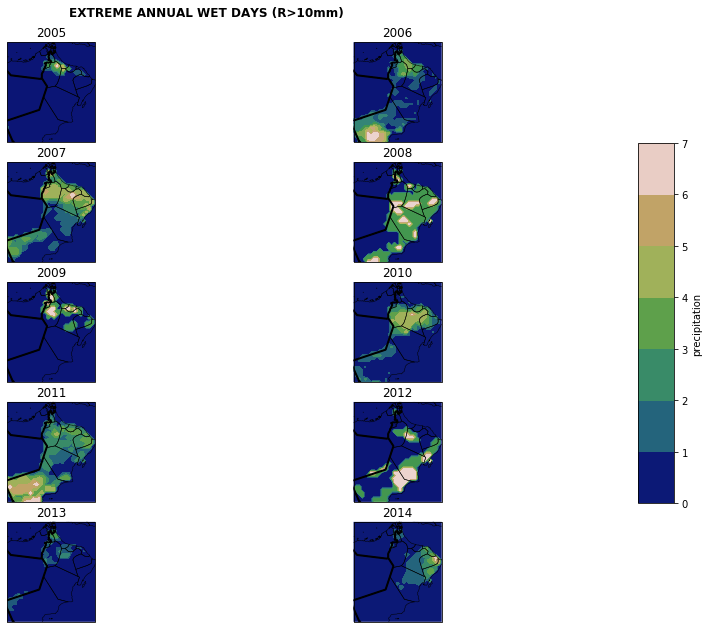

In [76]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75])
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(extreme_10mm_annual_wet_days.lon, extreme_10mm_annual_wet_days.lat, extreme_10mm_annual_wet_days[i],
                       cmap='gist_earth', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.80,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREME ANNUAL WET DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [77]:
extreme_20mm = oman_precip1
extreme_20mm_annual_wet_days = (extreme_20mm > 20).groupby('datetime.year').sum(dim='datetime')
extreme_20mm_annual_wet_days

<xarray.DataArray 'precip' (year: 18, lat: 41, lon: 34)>
dask.array<stack, shape=(18, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2014 2015 2016 2017 2018

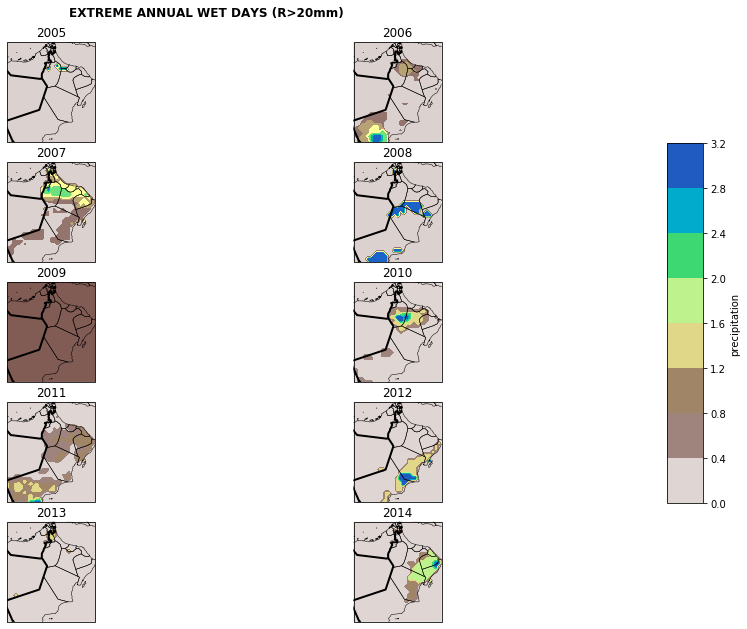

In [78]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75])
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(extreme_20mm_annual_wet_days.lon, extreme_20mm_annual_wet_days.lat, extreme_20mm_annual_wet_days[i],
                       cmap='terrain_r', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREME ANNUAL WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [79]:
oman_extreme_10mm = oman_precip1
extreme_10mm_monthly_wet_days = (oman_extreme_10mm > 10).groupby('datetime.month').sum(dim='datetime')
extreme_10mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 41, lon: 34)>
dask.array<stack, shape=(12, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

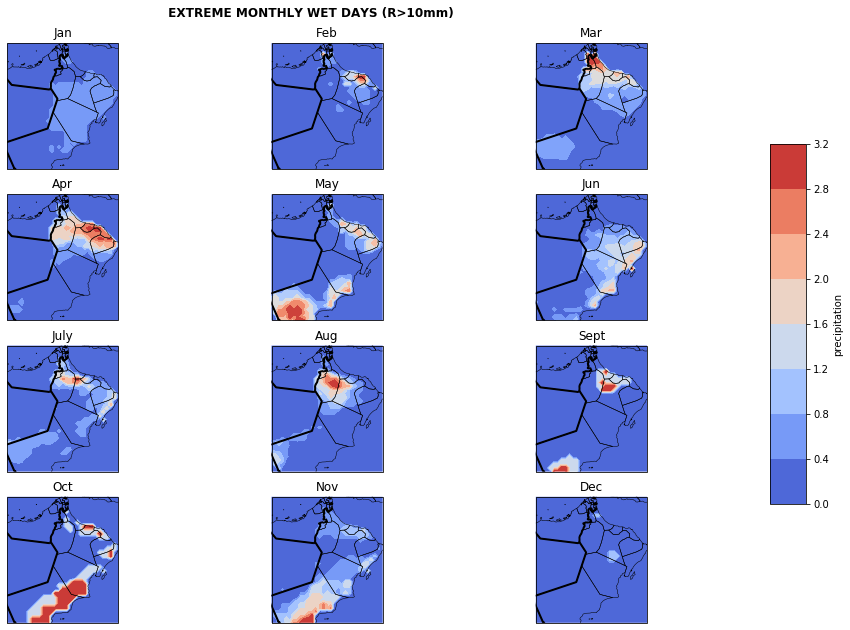

In [80]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_10mm_monthly_wet_days.lon, extreme_10mm_monthly_wet_days.lat, extreme_10mm_monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREME MONTHLY WET DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [81]:
oman_extreme_20mm = oman_precip1
extreme_20mm_monthly_wet_days = (oman_extreme_20mm> 20).groupby('datetime.month').sum(dim='datetime')
extreme_20mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 41, lon: 34)>
dask.array<stack, shape=(12, 41, 34), dtype=int64, chunksize=(1, 41, 34), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 51.75 52.0 52.25 52.5 52.75 ... 59.25 59.5 59.75 60.0
  * lat      (lat) float32 26.75 26.5 26.25 26.0 25.75 ... 17.5 17.25 17.0 16.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

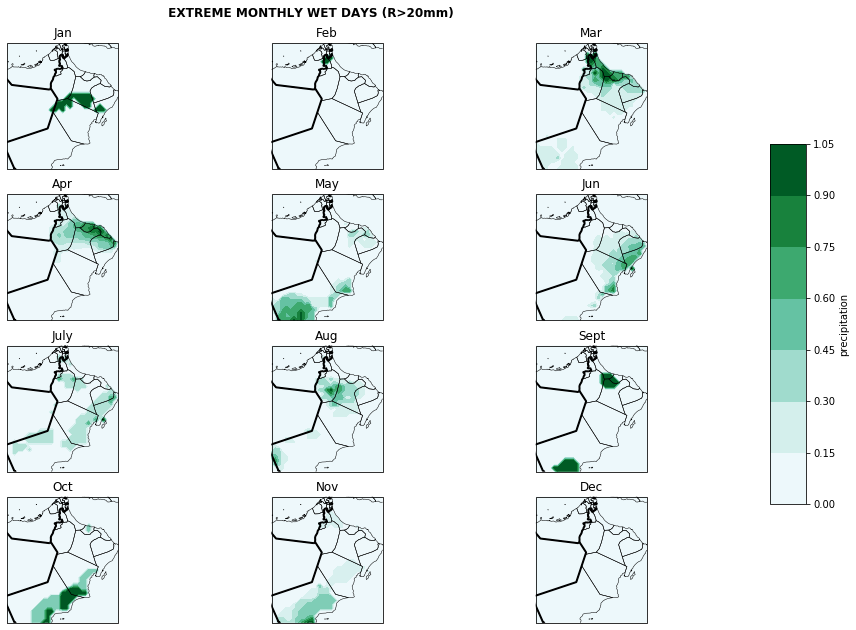

In [82]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([52.25,59.75,17.25,25.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_20mm_monthly_wet_days.lon, extreme_20mm_monthly_wet_days.lat, extreme_20mm_monthly_wet_days[i],
                       cmap='BuGn', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREME MONTHLY WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [97]:
#NUMBER OF EXTREME WET DAYS(RR>10mm) AND WET DAYS (RR>20mm) PER YEAR
annual_extreme_10mm_monthly_wet_days = (oman['precip']> 10).resample(datetime='1Y').sum()
annual_extreme_20mm_monthly_wet_days=(oman['precip']>20).resample(datetime='1Y').sum()


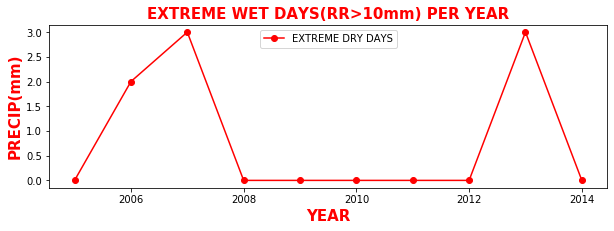

In [148]:
  #TIMESERIES FOR EXTREME WET DAYS(RR>10mm) PER YEAR
annual_extreme_10mm_monthly_wet_days = (oman['precip']> 10).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_extreme_10mm_monthly_wet_days.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME DRY DAYS')
ax.set_title('EXTREME WET DAYS(RR>10mm) PER YEAR',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

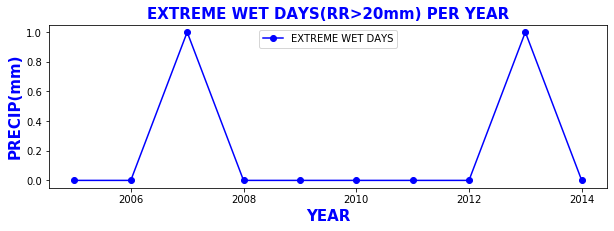

In [149]:
 #TIMESERIES FOR EXTREME WET DAYS(RR>20mm) PER YEAR
annual_extreme_20mm_monthly_wet_days = (oman['precip']> 20).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_extreme_20mm_monthly_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='EXTREME WET DAYS')
ax.set_title('EXTREME WET DAYS(RR>20mm) PER YEAR',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [105]:
monthly_extreme_10mm_monthly_wet_days = (oman['precip']> 10).resample(datetime='1M').sum()
monthly_extreme_20mm_monthly_wet_days = (oman['precip']>20).resample(datetime='1M').sum()

In [106]:
monthly_extreme_10mm_monthly_wet_days= monthly_extreme_10mm_monthly_wet_days.groupby('datetime.month').sum(dim='datetime')
monthly_extreme_20mm_monthly_wet_days= monthly_extreme_20mm_monthly_wet_days.groupby('datetime.month').sum(dim='datetime')

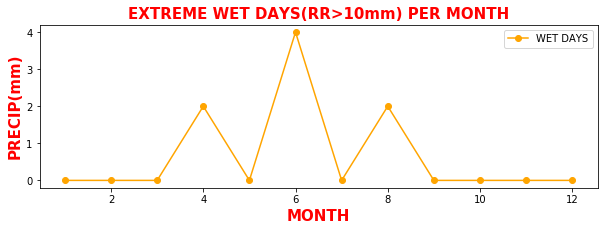

In [111]:
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_extreme_10mm_monthly_wet_days.plot(color = 'orange', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('EXTREME WET DAYS(RR>10mm) PER MONTH',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

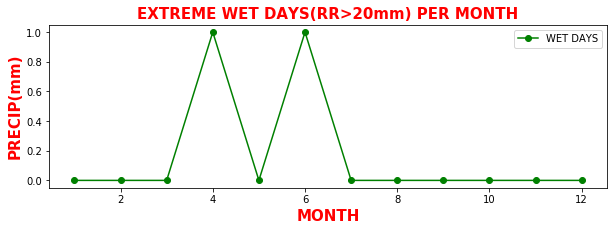

In [109]:
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
monthly_extreme_20mm_monthly_wet_days.plot(color = 'green', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('EXTREME WET DAYS(RR>20mm) PER MONTH',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()